# ANALISIS DATA TASPEN


    Created By : Kelompok 5 (Vada, Feby, dan Fredi)

    Context :

Taspen merupakan sebuah BUMN yang mengelola program Asuransi dan Dana Pensiun ASN di Indonesia. Taspen memiliki 57 kantor cabang yang tersebar di seluruh Indonesia, dan kantor cabang tersebut terbagi dalam 5 tipe yaitu, Kantor cabang tipe U, tipe A, Tipe B, Tipe C, dan Tipe D. 
Dalam final project data scientist ini, kami akan mencoba memetakan apakah data gaji ASN di wilayah kantor cabng Taspen memiliki pengaruh terhadap pencapaian KPI Fee Based Income kantor cabang Taspen, serta membuat permodelan untuk memprediksi pencapaian KPI Fee Based Income Kantor cabang Taspen.

    Target :

0 : Target Fee Based Income (FBI) tidak tercapai

1 : Target Fee Based Income (FBI) tercapai

    Problem Statement :

Pada tahun 2021 dari 57 kantor cabang Taspen hanya ada 6 kantor cabang yang mampu mencapai target KPI FBI , atau hanya sekitar 9% kantor cabang saja yang mampu mencapai target KPI FBI. Target FBI di kategorikan berdasarkan tipe kantor cabang. Kantor cabang tipe A memiliki target yang berbeda nominal nya dengan target kantor cabang tipe B, dan seterusnya. Dari seluruh kantor cabang yang berhasil mencapai KPI FBI, sebagian besar adalah kantor cabang tipe C. Ketimpangan pencapaian KPI tersebut, tentu memerlukan perhatian serta penelitian masalah sehingga, resiko kegagalan Kantor Cabang dalam mencapai KPI FBI dapat di mitigasi. 


    Goals :

Berdasarkan permasalahan tersebut, kami ingin membuat sebuah permodelan yang dapat di gunakan untuk memprediksi pencapaian KPI FBI kantor cabang Taspen, sehingga resiko kantor cabang yang gagal mencapai KPI FBI dapat di mitigasi dan Manajemen dapat membuat strategi yang lebih tepat untuk mengatasi permasalahan tersebut. Data yang di gunakan adalah data dari 3 kantor cabang tipe C yang berhasil mencapai target FBI dan 4 kantor cabang tipe C yang tidak berhasil mencapai KPI. Seluruh data yang di ambil adalah data kantor cabang tipe C agar mencapai hasil permodelan yang relevan.

    Analytic Approach :

Kita akan melakukan analisis data untuk menemukan pola yang membedakan antara karakteristik data gaji cabang yang berhasil mencapai KPI FBI dan yang tidak. Data yang di gunakan adalah data dari 3 kantor cabang tipe C yang berhasil mencapai target FBI dan 4 kantor cabang tipe C yang tidak berhasil mencapai KPI. Seluruh data yang di ambil adalah data kantor cabang tipe C agar mencapai hasil permodelan yang relevan.

3 data kantor cabang yang berhasil mencapai KPI FBI adalah , Kantor Cabang Bekasi, Jember, dan Kendari
4 data kantor cabang yang tidak berhasil mencapai KPI FBI adalah, Kantor cabang Depok, Tangerang, Ternate, dan Manokwari

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas kantor cabang akan mencapai KPI FBI atau tidak



> METRIC EVALUATION

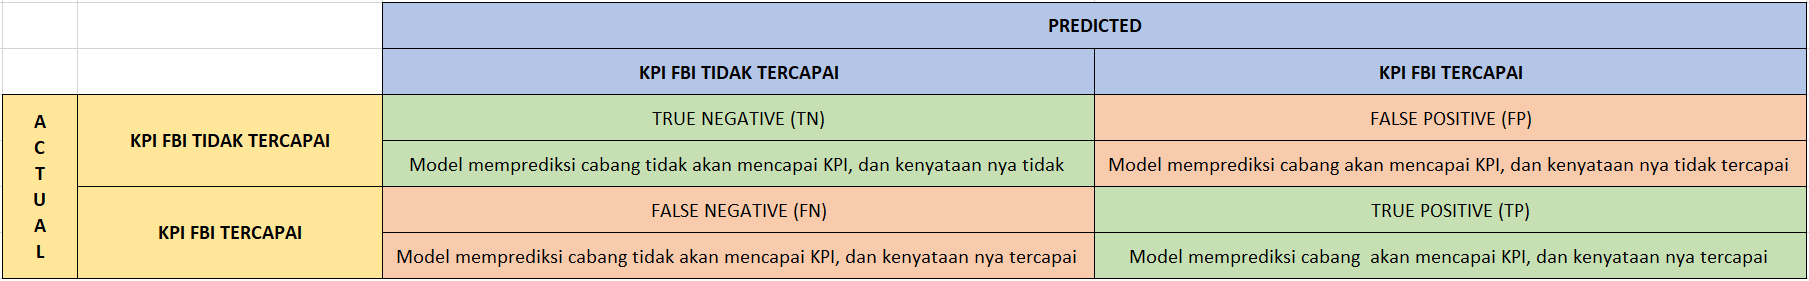

In [1]:
from IPython.display import Image
Image(filename='metrics.png') 

Type 1 error : False Positive
Konsekuensi: Kesalahan dalam menentukan strategi penentuan readjusment KPI, KPI cabang menjadi 'Over Estimated'.

Type 2 error : False Negative
Konsekuensi: Kesalahan dalam menentukan strategi penentuan readjusment KPI, KPI cabang menjadi 'Under Estimated'.

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat memprediksi potensi capaian KPI FBI kantor cabang seakurat mungkin, sehingga performa dan revenue cabang dapat di maksimalkan. Oleh karena itu kami fokus pada recall positive score (menekan nilai False Negative).

> DATA UNDERSTANDING

In [77]:
%% html
<div class='tableauPlaceholder' id='viz1662963094869' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;fi&#47;finalprojectnb&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='finalprojectnb&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;fi&#47;finalprojectnb&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1662963094869');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1377px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

UsageError: Cell magic `%%` not found.


    Dataset source : PT TASPEN (PERSERO)

    Note :

- Dataset tidak seimbang
- Sebagian fitur bersifat kategorikal
- Setiap baris data merepresentasikan karakteristik peserta cabang Taspen dan pencapaian KPI FBI Cabang


    Keterangan isi kolom :

- NAMA_STATUS_PEGAWAI = Keterangan Status Pegawai Peserta
- JENIS_KELAMIN = Jenis Kelamin Peserta
- UMUR = Usia Peserta dalam Tahun
- NAMA_STATUS_KAWIN = Status pernikahan peserta
- JML_ISTRI = Jumlah istri peserta
- JML_ANAK = Jumlah anak peserta 
- MASA_KERJA = Masa kerja peserta dari calon pegawai sampai 1 Desember 2021
- THP = Take Home Pay , total pendapatan peserta Taspen (gaji pokok + tunjangan istri + tunjangan anak)
- NAMA_DATI1 = Nama Provinsi peserta
- KOTA = Kota cabang Taspen
- FBI = Pencapaian KPI FBI tahun 2021 ( 1 = Tercapai, 0 = Tidak Tercapai)

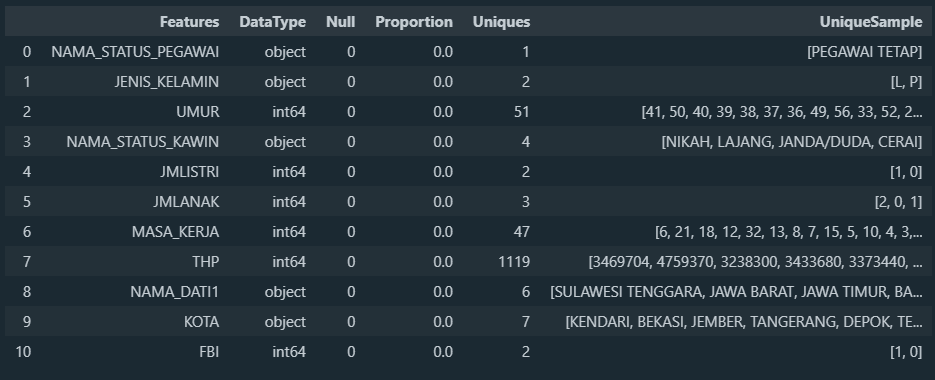

In [2]:
Image(filename='datainfo.png') 

<hr>

> IMPORT LIBRARIES

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from scipy.stats import shapiro

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import plot_importance

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

# Imbalanced treatment
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.metrics import fbeta_score, balanced_accuracy_score, brier_score_loss

# Multicollinearity test
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
# Set max columns
# pd.set_option('display.max_columns', None)

<hr>

# EXPLARATORY DATA ANALYSIS (EDA)

>LOAD DATA SET

In [4]:
# Load dataset
df = pd.read_excel('dataset_taspen.xlsx')
df.head()

,NAMA_STATUS_PEGAWAI,JENIS_KELAMIN,UMUR,NAMA_STATUS_KAWIN,JMLISTRI,JMLANAK,MASA_KERJA,THP,NAMA_DATI1,KOTA,FBI
0,PEGAWAI TETAP,L,41,NIKAH,1,2,6,3469704,SULAWESI TENGGARA,KENDARI,1
1,PEGAWAI TETAP,L,50,NIKAH,1,0,21,4759370,SULAWESI TENGGARA,KENDARI,1
2,PEGAWAI TETAP,L,40,NIKAH,0,0,18,3238300,SULAWESI TENGGARA,KENDARI,1
3,PEGAWAI TETAP,L,39,NIKAH,1,2,6,3433680,SULAWESI TENGGARA,KENDARI,1
4,PEGAWAI TETAP,L,41,NIKAH,1,2,6,3433680,SULAWESI TENGGARA,KENDARI,1


> CEK KOMPONEN DATA SET

In [5]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91533 entries, 0 to 91532
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   NAMA_STATUS_PEGAWAI  91533 non-null  object
 1   JENIS_KELAMIN        91533 non-null  object
 2   UMUR                 91533 non-null  int64 
 3   NAMA_STATUS_KAWIN    91533 non-null  object
 4   JMLISTRI             91533 non-null  int64 
 5   JMLANAK              91533 non-null  int64 
 6   MASA_KERJA           91533 non-null  int64 
 7   THP                  91533 non-null  int64 
 8   NAMA_DATI1           91533 non-null  object
 9   KOTA                 91533 non-null  object
 10  FBI                  91533 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.7+ MB


In [6]:
"Membuat function untuk mempermudah review kompnen dataset"
def preview(df):
    '''
    Returns a summary of attributes including dtype, proportion of missing values,
    number of unique values, and sample.
    '''
    
    df_check = []
    for i in df.columns:
        df_check .append([
                    i,
                    df[i].dtype,
                    df[i].isna().sum(),
                    round(df[i].isna().sum() / len(df) * 100, 2),
                    df[i].nunique(),
                    df[i].drop_duplicates().values])
        
    return pd.DataFrame(df_check, columns=['Features', 'DataType', 'Null', 'Proportion', 'Uniques', 'UniqueSample'])

In [7]:
"Review komponen dataset"
preview(df)

,Features,DataType,Null,Proportion,Uniques,UniqueSample
0,NAMA_STATUS_PEGAWAI,object,0,0.0,1,[PEGAWAI TETAP]
1,JENIS_KELAMIN,object,0,0.0,2,"[L, P]"
2,UMUR,int64,0,0.0,51,"[41, 50, 40, 39, 38, 37, 36, 49, 56, 33, 52, 2..."
3,NAMA_STATUS_KAWIN,object,0,0.0,4,"[NIKAH, LAJANG, JANDA/DUDA, CERAI]"
4,JMLISTRI,int64,0,0.0,2,"[1, 0]"
5,JMLANAK,int64,0,0.0,3,"[2, 0, 1]"
6,MASA_KERJA,int64,0,0.0,47,"[6, 21, 18, 12, 32, 13, 8, 7, 15, 5, 10, 4, 3,..."
7,THP,int64,0,0.0,1119,"[3469704, 4759370, 3238300, 3433680, 3373440, ..."
8,NAMA_DATI1,object,0,0.0,6,"[SULAWESI TENGGARA, JAWA BARAT, JAWA TIMUR, BA..."
9,KOTA,object,0,0.0,7,"[KENDARI, BEKASI, JEMBER, TANGERANG, DEPOK, TE..."


Depok dan Bekasi berada di satu provinsi yang sama (Jawa Barat)

> CEK PROPORSI TARGET

In [8]:
"Pengecekan proporsi target"
target_prop = round(df['FBI'].value_counts(normalize=True) * 100, 2).reset_index()
target_prop = target_prop.rename({'index': 'FBI class', 'FBI': 'Proportion'}, axis=1)
target_prop.set_index('FBI class')

,Proportion
FBI class,
0,51.15
1,48.85


    Ringkasan Data :

- Tidak terdapat null value pada data set
- Masih terdapat beberapa fitur kategorikal yang perlu di lakukan encoding treatment agar dapat di masukan dalam algOritma
- Data pada masing-masing fitur memiliki kelas yang berbeda, perlu di lakukan scaling 
- Proporsi Target tidak seimbang (imbalance), perlu di lakukan imbalance treatment
- Terdapat beberapa fitur yang tidak di perlukan untuk permodelan

<hr>

> DATA CLEANING

In [9]:
"Pengecekan missing value pada dataset"
df.isna().sum()

NAMA_STATUS_PEGAWAI    0
JENIS_KELAMIN          0
UMUR                   0
NAMA_STATUS_KAWIN      0
JMLISTRI               0
JMLANAK                0
MASA_KERJA             0
THP                    0
NAMA_DATI1             0
KOTA                   0
FBI                    0
dtype: int64

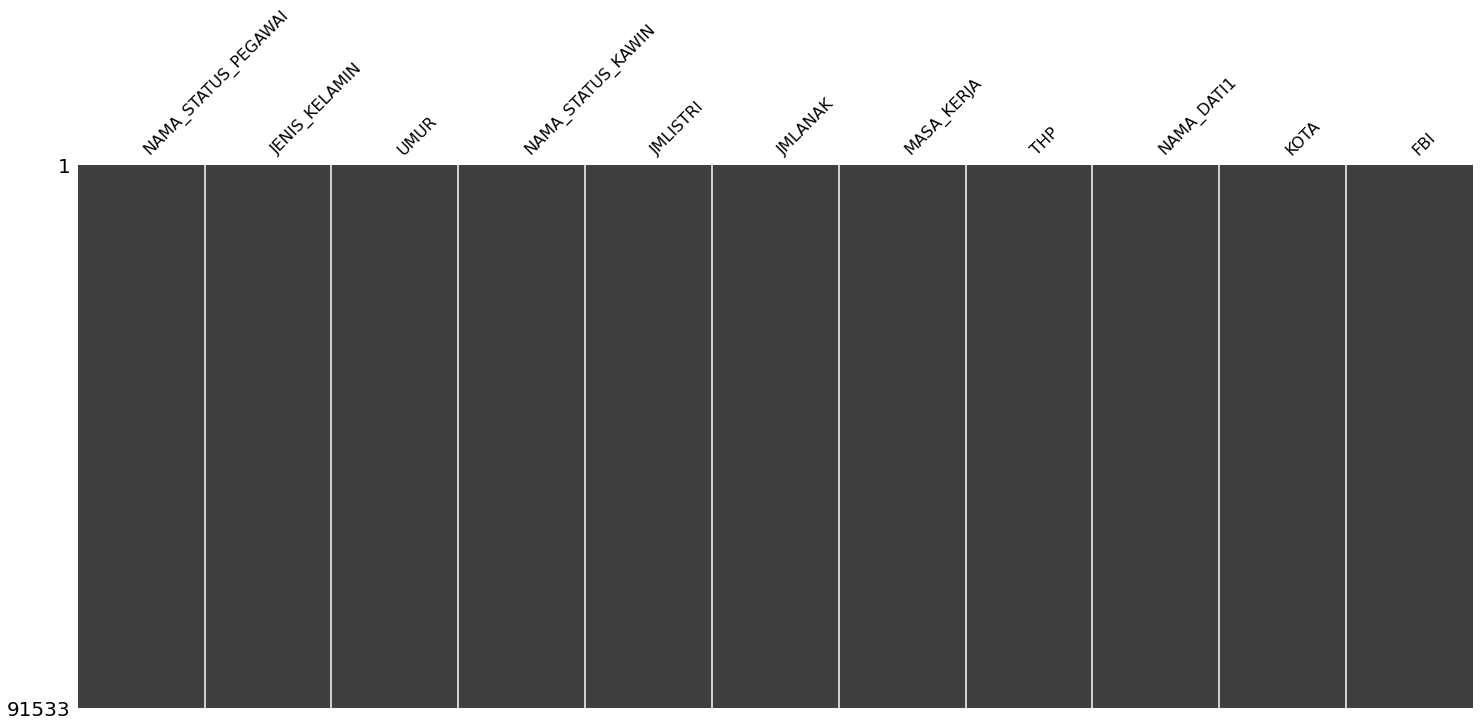

In [10]:
"Ploting missing value matrix"
msno.matrix(df, sparkline=False);

- Droping fitur yang berkemungkinan menyebabkan bias pada model yaitu 'NAMA_STATUS_PEGAWAI', 'NAMA_DATI1', 'KOTA'

In [11]:
"Menghapus fitur (kolom) yang tidak di perlukan untuk permodelan"
dfn = df.drop(columns=['NAMA_STATUS_PEGAWAI','NAMA_DATI1','KOTA'])

In [12]:
"Review komponen data set setelah dilakukan penghapusan fitur yang tidak di perlukan"
preview(dfn)

,Features,DataType,Null,Proportion,Uniques,UniqueSample
0,JENIS_KELAMIN,object,0,0.0,2,"[L, P]"
1,UMUR,int64,0,0.0,51,"[41, 50, 40, 39, 38, 37, 36, 49, 56, 33, 52, 2..."
2,NAMA_STATUS_KAWIN,object,0,0.0,4,"[NIKAH, LAJANG, JANDA/DUDA, CERAI]"
3,JMLISTRI,int64,0,0.0,2,"[1, 0]"
4,JMLANAK,int64,0,0.0,3,"[2, 0, 1]"
5,MASA_KERJA,int64,0,0.0,47,"[6, 21, 18, 12, 32, 13, 8, 7, 15, 5, 10, 4, 3,..."
6,THP,int64,0,0.0,1119,"[3469704, 4759370, 3238300, 3433680, 3373440, ..."
7,FBI,int64,0,0.0,2,"[1, 0]"


    Insight :
    
Dari matrik dan hasil sintax di atas terbukti tidak ada null value, sehingga tidak diperlukan imputer treatment atau missing value treatment lain.
Data sudah bersih dari null value sehingga bisa dilakukan langkah selanjutnya


<hr>

# DATA ANALYSIS

> PLOTING FIGURE (GRAFIK) UNTUK ANALISIS DATA

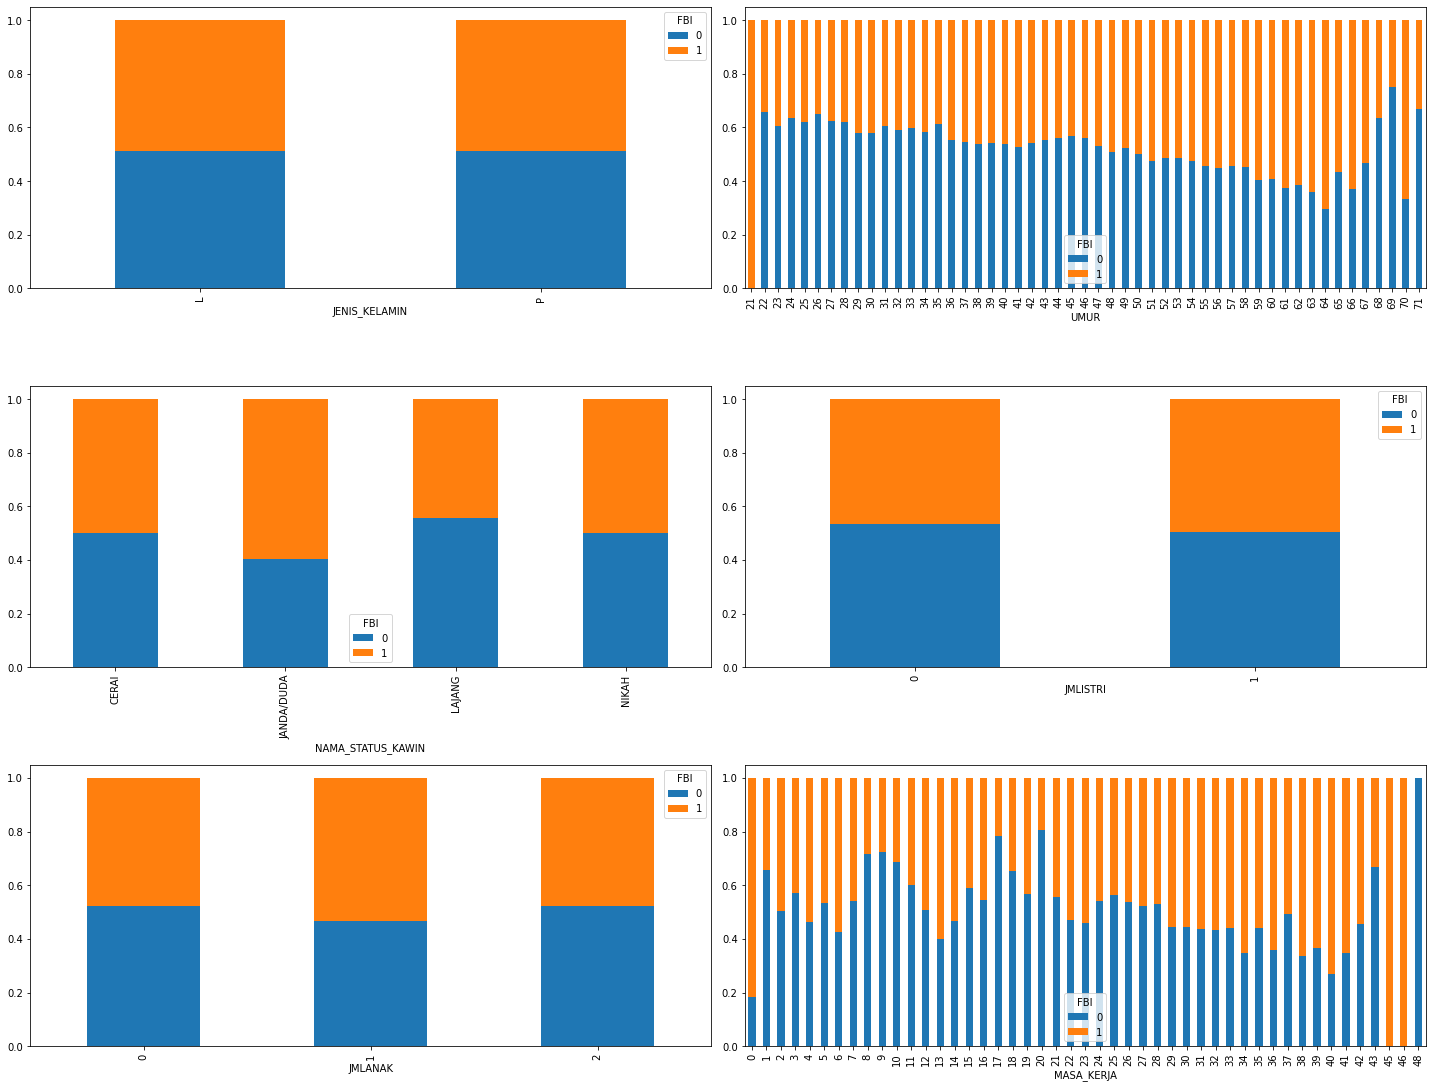

In [87]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in dfn.columns.drop(['THP', 'FBI']):
    count += 1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['FBI'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

In [14]:
for i in dfn.columns:
    relevent_experience_df = df.groupby(i)['FBI'].value_counts(normalize=True).unstack()
    display(relevent_experience_df.sort_values(by=[1.0], ascending=False))

FBI,0,1
JENIS_KELAMIN,,
L,0.510777,0.489223
P,0.512245,0.487755


FBI,0,1
UMUR,,
21,NaN,1.000000
64,0.294737,0.705263
70,0.333333,0.666667
63,0.357895,0.642105
66,0.371429,0.628571
61,0.372629,0.627371
62,0.386861,0.613139
59,0.402490,0.597510
60,0.405692,0.594308


FBI,0,1
NAMA_STATUS_KAWIN,,
JANDA/DUDA,0.405168,0.594832
NIKAH,0.499394,0.500606
CERAI,0.500000,0.500000
LAJANG,0.556206,0.443794


FBI,0,1
JMLISTRI,,
1,0.502711,0.497289
0,0.533838,0.466162


FBI,0,1
JMLANAK,,
1,0.465454,0.534546
2,0.523181,0.476819
0,0.523323,0.476677


FBI,0,1
MASA_KERJA,,
46,NaN,1.000000
45,NaN,1.000000
0,0.183394,0.816606
40,0.270833,0.729167
38,0.336248,0.663752
41,0.347826,0.652174
34,0.348092,0.651908
36,0.359745,0.640255
39,0.366730,0.633270


FBI,0,1
THP,,
2016000,NaN,1.0
2577500,NaN,1.0
3235792,NaN,1.0
3278000,NaN,1.0
3304800,NaN,1.0
...,...,...
5761104,1.0,NaN
5914700,1.0,NaN
6022240,1.0,NaN


FBI,0,1
FBI,,
1,NaN,1.0
0,1.0,NaN


    Insight

- Dari bar chart di atas terlihat bahwa data pada fitur JENIS_KELAMIN, NAMA_STATUS_KAWIN, JMLISTRI, dan JMLANAK, tidak begitu berpengaruh terhadap target (FBI), karena proporsi FBI pada fitur-fitur tersebut tidak terlalu bervariasi (mendekati 50 : 50), sehingga fitur-fitur tersebut di perkirakan tidak berpengaruh signifikan terhadap hasil permodelan,

- Fitur-fitur yang terlihat memiliki proporsi FBI bervariasi adalah fitur; UMUR, MASA_KERJA, dan THP. Sehingga diperkirakan fitur-fitur tersebut akan berpengaruh signifikan terhadap hasil permodelan



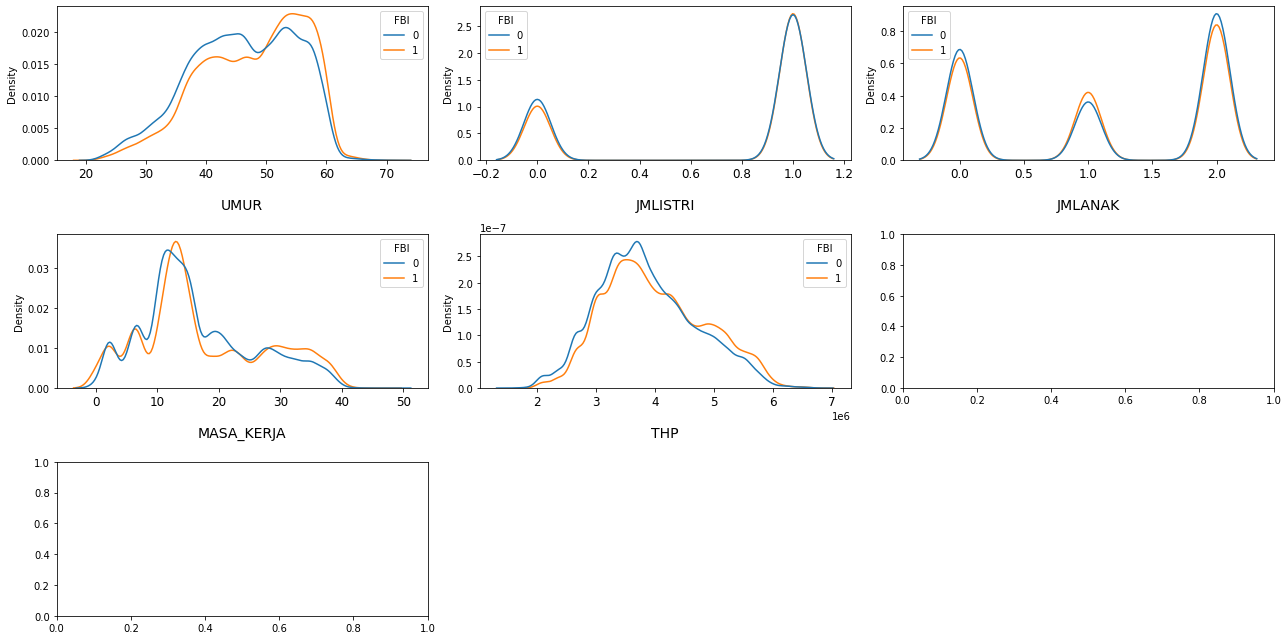

In [96]:

fig, ax = plt.subplots(3, 3, figsize=(18, 9))

count = 1


for i in dfn.columns[((dfn.dtypes == 'int64') | (dfn.dtypes == 'float64')) & ~dfn.columns.isin(['FBI'])]:
    plt.subplot(3, 3, count)
    sns.kdeplot(x=dfn[i], hue=dfn['FBI'])
    plt.xlabel(i, fontsize=14, labelpad=18)
    plt.xticks(fontsize=12)
    count += 1

    ax[2, 1].set_axis_off()
    ax[2, 2].set_axis_off()

fig.tight_layout();

    Insight

- persebaran umur pada data set di dominasi data pegawai dengan rentang umur 40 - 60 (usia aktif pegawai)
- data masa kerja di dominasi data pegawai dengan masa kerja 10 - 20 tahun
- data THP paling banyak berada di kisaran 4 Juta

> TABLEAU DATAVIZ EMBEDED

<iframe src=
"https://public.tableau.com/views/finalprojectnb/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link:showVizHome=no&:embed=true"
 width="600" height="900"></iframe>
 

[Tableu References](https://public.tableau.com/app/profile/vada.erlangga/viz/finalprojectnb/Dashboard1?publish=yes)

    Dataviz Analysis 

- Pada Grafik masa kerja rata-rata, peserta Taspen pada kantor cabang yang berhasil mencapai KPI FBI terlihat memiliki rata-rata masa kerja yang lebih lama di banding rata-rata masa kerja peserta kantor cabang yang tidak berhasil mencapai KPI FBI

- Pada Grafik THP rata-rata, peserta Taspen pada kantor cabang yang berhasil mencapai KPI FBI terlihat memiliki rata-rata THP yang lebih besar di banding rata-rata THP peserta kantor cabang yang tidak berhasil mencapai KPI FBI

- Sementara pada Grafik Jumlah anak terlihat bahwa sebagian besar kantor cabang pada dataset memiliki modus data jumlah anak 1 untuk setiap pegawai, hanya kantor cabang manokwari yang memiliki modus data 2 anak.

    Insight :

Lama masa kerja memiliki pengaruh terhadap THP seorang pegawai, karena semakin lama masa kerja tentu semakin tinggi golongan dan gaji pokok yang di miliki pegawai, dan dari gambaran persebaran dan proporsi data pada grafik-grafik di atas terlihat pola hubungan, Masa Kerja yang semakin lama maka THP semakin tinggi, dan di asumsikan bahwa dengan THP yang tinggi maka Pegawai akan memiliki kemampuan untuk membeli produk-produk anak perusahaan. Penjualan produk-produk anak perusahaan Taspen sendiri merupakan komponen utama penyokong pencapaian KPI FBI kantor cabang.

<hr>

# DATA PREPARATION

> NORMALITY TEST

Dilakukan normality test untuk mengeceka apakah data-data yang ada pada dataset memenuhi pola persebaran distribusi normal atau tidak

In [15]:
'Membuat fungsi untuk mengecek apakah persebaran data pada fitur-fitur di dataset terdistribusi normal atau tidak'
'H0 = Data terdistribusi normal'

columns = ['THP', 'JMLISTRI', 'JMLANAK', 'MASA_KERJA','UMUR']

feature = []
pvalue = []
conclusion = []

for i in columns:
    feature.append(i)
    tstat, pval = shapiro(dfn[i])
    pvalue.append(pval)

    # Conclusion
    if pval < 0.05 :
        conclusion.append('Reject H0')
    else :
        conclusion.append('Fail to reject H0')

pd.DataFrame(
                {
                 'Feature' : feature,
                 'p-Value' : pvalue,
                 'Conclusion' : conclusion
                }
            )

,Feature,p-Value,Conclusion
0,THP,0.0,Reject H0
1,JMLISTRI,0.0,Reject H0
2,JMLANAK,0.0,Reject H0
3,MASA_KERJA,0.0,Reject H0
4,UMUR,0.0,Reject H0


    Insight :

- Seluruh Numerical Feature menghasilkan conclusion 'Reject H0' yang berarti gagal memenuhi asumsi distribusi normal. Gunakan spearman method, serta nonparametrics model

<hr>

> MULTICOLLINEARITY CHECK

Dilakukan pengecekan score multicollinearity untuk menghindari bias pada permodelan serta efisiensi fitur, agar permodelan dapat berjalan lebih cepat.

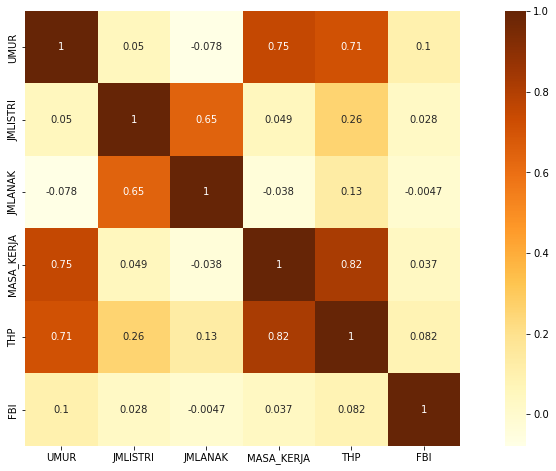

In [16]:
'Cek korelasi antar fitur'
corr = dfn.corr(method='spearman')
plt.figure(figsize = (16, 8))
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot=True,
            cmap='YlOrBr', 
            square=True);

    Insight :

Dari Heat Map di atas terlihat bahwa fitur MASA_KERJA dan THP memiliki korelasi yang cukup tinggi , sehingga perlu dilakukan pengecekan VIF Score pada kedua fitur tersebut, untuk mengetahui apakah fitur tersebut dapat di pertahankan atau harus di drop salah satu nya

In [18]:
def calc_vif(x):
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

In [19]:
calc_vif(dfn[['MASA_KERJA','THP']])

,variables,VIF
0,MASA_KERJA,7.929883
1,THP,7.929883


    Insight :
    
Dari hasil multicollinearity test dengan menggunakan metode VIF score, di ketahui bahwa multicollinearity yang dimiliki fitur 'MASA_KERJA' - 'THP' cukup tinggi,
namun masih berada di bawah 10, sehingga fitur tersebut masih tetap akan di gunakan untuk permodelan, karena mempertimbangkan minim nya fitur yang dimiliki.

<hr>

# DATA PREPROCESSING

    SCHEMAS :

- Encoding dengan One Hot Encoder fitur kategorikal : 'JENIS_KELAMIN' , 'NAMA_STATUS_KAWIN'
- Scalling dengan Robust Scaler fitur numerikal : 'UMUR', 'MASA_KERJA', 'THP'
- No Treatment : 'JMLISTRI', 'JMLANAK', 'FBI'


In [20]:
# Preprocessing steps


# Encoding dilakukan agar fitur-fitur ini dapat dijadikan input dalam pemodelan (harus dalam bentuk numerik)
list_one_hot_encoder = ['JENIS_KELAMIN', 'NAMA_STATUS_KAWIN']


# Robust scaler digunakan untuk menyamakan skala data pada tiap numerical features
list_robust_scaler = ['UMUR', 'MASA_KERJA', 'THP']

# Define semua process transformasi yang akan dilakukan, dibungkus di dalam sebuah column transformer
transformer = ColumnTransformer(
                                    [
                                        ('one_hot_encoder', OneHotEncoder(drop='first'), list_one_hot_encoder),
                                        ('robust_scaler', RobustScaler(), list_robust_scaler)
                                    ],
                                    remainder='passthrough' # untuk variable yang tidak dikenakan treatment 
                               )

In [21]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91533 entries, 0 to 91532
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   JENIS_KELAMIN      91533 non-null  object
 1   UMUR               91533 non-null  int64 
 2   NAMA_STATUS_KAWIN  91533 non-null  object
 3   JMLISTRI           91533 non-null  int64 
 4   JMLANAK            91533 non-null  int64 
 5   MASA_KERJA         91533 non-null  int64 
 6   THP                91533 non-null  int64 
 7   FBI                91533 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 5.6+ MB


    Action :

- Define X and y
- X = features yang akan digunakan untuk pemodelan
- y = target yang ingin diprediksi nilainya

In [22]:
list_remainder = ['JMLISTRI','JMLANAK']

input_vars = []
input_vars.extend(list_one_hot_encoder + list_robust_scaler + list_remainder) # The order of variables must align with the order of transformer

X = dfn[input_vars]
y = dfn['FBI']

In [23]:
input_vars

['JENIS_KELAMIN',
 'NAMA_STATUS_KAWIN',
 'UMUR',
 'MASA_KERJA',
 'THP',
 'JMLISTRI',
 'JMLANAK']

In [24]:
# Data splitting
# Urutan variabel harus sama seperti ini
# proporsi data train 80 % dan data test 20 %
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    stratify=y, # untuk menjaga proporsi antar kelas di target/label
                                                    test_size=0.2, # proporsi data train 80 % dan data test 20 %
                                                    random_state=42) # nilai random state yang lazim digunakan di berbagai literatur dan referensi

    Action :

- Menampung hasil encoding dan scaling dalam data frame

In [25]:
df_result = pd.DataFrame(transformer.fit_transform(X_train))
df_result.head()

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,1.0,-0.285714,-0.083333,0.181528,1.0,1.0
1,1.0,0.0,0.0,1.0,-0.571429,-0.333333,0.067917,1.0,2.0
2,1.0,0.0,0.0,1.0,-0.357143,-0.083333,-0.194090,1.0,2.0
3,1.0,0.0,1.0,0.0,0.500000,-0.083333,-0.245630,0.0,0.0
4,1.0,0.0,0.0,1.0,0.428571,0.333333,-0.054951,0.0,0.0


In [26]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_P', 'x1_JANDA/DUDA', 'x1_LAJANG', 'x1_NIKAH'], dtype=object)

In [27]:
# Bisa digunakan untuk melihat hasil transformasi dalam bentuk DataFrame
# Atau digunakan untuk plot feature importances

feature_names = list(transformer.transformers_[0][1].get_feature_names()) + list_robust_scaler + list_remainder
feature_names

['x0_P',
 'x1_JANDA/DUDA',
 'x1_LAJANG',
 'x1_NIKAH',
 'UMUR',
 'MASA_KERJA',
 'THP',
 'JMLISTRI',
 'JMLANAK']

In [28]:
df_result = pd.DataFrame(transformer.fit_transform(X_train), columns=feature_names)
df_result.head()

,x0_P,x1_JANDA/DUDA,x1_LAJANG,x1_NIKAH,UMUR,MASA_KERJA,THP,JMLISTRI,JMLANAK
0,0.0,0.0,0.0,1.0,-0.285714,-0.083333,0.181528,1.0,1.0
1,1.0,0.0,0.0,1.0,-0.571429,-0.333333,0.067917,1.0,2.0
2,1.0,0.0,0.0,1.0,-0.357143,-0.083333,-0.194090,1.0,2.0
3,1.0,0.0,1.0,0.0,0.500000,-0.083333,-0.245630,0.0,0.0
4,1.0,0.0,0.0,1.0,0.428571,0.333333,-0.054951,0.0,0.0


In [29]:
preview(dfn)

,Features,DataType,Null,Proportion,Uniques,UniqueSample
0,JENIS_KELAMIN,object,0,0.0,2,"[L, P]"
1,UMUR,int64,0,0.0,51,"[41, 50, 40, 39, 38, 37, 36, 49, 56, 33, 52, 2..."
2,NAMA_STATUS_KAWIN,object,0,0.0,4,"[NIKAH, LAJANG, JANDA/DUDA, CERAI]"
3,JMLISTRI,int64,0,0.0,2,"[1, 0]"
4,JMLANAK,int64,0,0.0,3,"[2, 0, 1]"
5,MASA_KERJA,int64,0,0.0,47,"[6, 21, 18, 12, 32, 13, 8, 7, 15, 5, 10, 4, 3,..."
6,THP,int64,0,0.0,1119,"[3469704, 4759370, 3238300, 3433680, 3373440, ..."
7,FBI,int64,0,0.0,2,"[1, 0]"


In [30]:
preview(df_result)

,Features,DataType,Null,Proportion,Uniques,UniqueSample
0,x0_P,float64,0,0.0,2,"[0.0, 1.0]"
1,x1_JANDA/DUDA,float64,0,0.0,2,"[0.0, 1.0]"
2,x1_LAJANG,float64,0,0.0,2,"[0.0, 1.0]"
3,x1_NIKAH,float64,0,0.0,2,"[1.0, 0.0]"
4,UMUR,float64,0,0.0,51,"[-0.2857142857142857, -0.5714285714285714, -0...."
5,MASA_KERJA,float64,0,0.0,47,"[-0.08333333333333333, -0.3333333333333333, 0...."
6,THP,float64,0,0.0,1095,"[0.1815277339923186, 0.06791717938026909, -0.1..."
7,JMLISTRI,float64,0,0.0,2,"[1.0, 0.0]"
8,JMLANAK,float64,0,0.0,3,"[1.0, 2.0, 0.0]"


<hr>

# MODEL & EVALUATION

> MODEL BENCHMARK

    Action :

- Menentukan Model Learning

In [32]:

# Classical machine learning algorithms
from tabnanny import verbose

#base model
logreg = LogisticRegression(random_state=42, solver='liblinear')
tree = DecisionTreeClassifier(random_state=42, max_depth=5)
knn = KNeighborsClassifier(n_neighbors=5)

# Ensemble models
# Voting classifier
base_models = [
    ('logreg', logreg),
    ('tree', tree),
    ('knn', knn)
]

voting_clf_hard = VotingClassifier(
    estimators=base_models,
    n_jobs=-1
)

voting_clf_soft = VotingClassifier(
    estimators=base_models,
    voting='soft',
    n_jobs=-1
)

# Stacking
stacking_logreg = StackingClassifier(
    estimators=base_models,
    final_estimator=logreg # ini adalaha meta learner nya (bisa di ganti)
)

stacking_tree = StackingClassifier(
    estimators=base_models,
    final_estimator=tree
)

# Bagging & Pasting
    # Bagging --> bootstrap sampling (sampling with replacement)
    # Pasting --> sampling without replacement

bagging_logreg = BaggingClassifier(
    base_estimator=logreg,
    n_estimators=10,
    bootstrap=True,
    random_state=42,
    oob_score=True
)

pasting_logreg = BaggingClassifier(
    base_estimator=logreg,
    n_estimators=10,
    bootstrap=False,
    random_state=42
)

# Random Forest
rf = RandomForestClassifier(
    random_state=42,
    max_depth=5
)

# Boosting models
ada_boost = AdaBoostClassifier( 
    base_estimator= tree,
    n_estimators= 200,
    learning_rate= 0.1,
    random_state= 2020
)

grad_boost = GradientBoostingClassifier(
    random_state=42,
    max_depth=3
)

xgboost = xgb.XGBClassifier(use_label_encoder=False, verbosity=0) # hyperparameter yang digunakan untuk menghilangkan warning

In [33]:
# Set max columns
pd.set_option('display.max_columns', None)

In [34]:
df_result.head()

,x0_P,x1_JANDA/DUDA,x1_LAJANG,x1_NIKAH,UMUR,MASA_KERJA,THP,JMLISTRI,JMLANAK
0,0.0,0.0,0.0,1.0,-0.285714,-0.083333,0.181528,1.0,1.0
1,1.0,0.0,0.0,1.0,-0.571429,-0.333333,0.067917,1.0,2.0
2,1.0,0.0,0.0,1.0,-0.357143,-0.083333,-0.194090,1.0,2.0
3,1.0,0.0,1.0,0.0,0.500000,-0.083333,-0.245630,0.0,0.0
4,1.0,0.0,0.0,1.0,0.428571,0.333333,-0.054951,0.0,0.0


    Action :

- Imbalance Treatment dan Modeling dalam sebuah loop

In [35]:

# Define imbalanced treatments
rus = RandomUnderSampler(random_state=42, sampling_strategy='auto')
ros = RandomOverSampler(random_state=42, sampling_strategy='auto')
smote = SMOTE(random_state=42, sampling_strategy='auto')
smotenc = SMOTENC(categorical_features=np.array(range(0, 4)), random_state=42, sampling_strategy= 'auto')
                    # categorical_features diisi dengan index kolom kategorikal berada (setelah dilakukan transformasi)
nearmiss = NearMiss(sampling_strategy='auto')

# Define end-to-end pipeline
list_model = [logreg, tree, knn, voting_clf_hard, voting_clf_soft, bagging_logreg,
                pasting_logreg, stacking_logreg, stacking_tree, rf, ada_boost, grad_boost, xgboost]
list_imb_treatment = [ rus, ros, smote, nearmiss]
score = []
mean_score = []
std_score = []

for i in list_model:
    for j in list_imb_treatment:
        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        estimator = Pipeline([
            ('preprocessing', transformer),
            ('resampling', j),
            ('model', i)
        ])

        model_cv = cross_val_score(
                                    estimator, 
                                    X_train, 
                                    y_train, 
                                    cv=skfold,
                                    scoring='recall',  #Mengambil nilai recall untuk menekan nilai False Negative (FN)
                                    n_jobs=-1,
                                    error_score='raise'
                                )
        score.append(model_cv)
        mean_score.append(model_cv.mean())
        std_score.append(model_cv.std())

In [36]:
# Membuat list untuk setiap kombinasi antara model dan imbalanced treatment dengan bantuan itertools
import itertools

model_treatment = list(itertools.product([i.__class__.__name__ for i in list_model], [j.__class__.__name__ for j in list_imb_treatment]))
len(model_treatment)

52

In [37]:
# Menyiapkan bahan untuk kolom 'Model' pada DataFrame
list_models_name = ['logreg', 'tree', 'knn', 'voting_clf_hard', 'voting_clf_soft', 'bagging_logreg',
                'pasting_logreg', 'stacking_logreg', 'stacking_tree', 'rf', 'ada_boost', 'grad_boost', 'xgboost']

# Agar tiap nama model ada repetisi sebanyak 4 kali (karena imbalanced treatments ada 4 variasi)
model_name = list(itertools.chain.from_iterable(itertools.repeat(x, 4) for x in [name for name in list_models_name]))
len(model_name)

52

    Action :

- Menampilkan urutan hasil recall score dari seluruh model benchmark yang sudah di define dan menampung nya dalam variabel

In [38]:
# Buat DataFrame untuk menampilkan hasil
high_score= pd.DataFrame({
                        'Model': model_name,
                        'Model_treatment': model_treatment,
                        'Recall_mean_score': mean_score,
                        'Recall_std_score': std_score
                        }).sort_values(by='Recall_mean_score', ascending=False).reset_index(drop=True)

high_score.head(10)


,Model,Model_treatment,Recall_mean_score,Recall_std_score
0,xgboost,"(XGBClassifier, RandomUnderSampler)",0.620185,0.006706
1,ada_boost,"(AdaBoostClassifier, RandomOverSampler)",0.618899,0.008739
2,ada_boost,"(AdaBoostClassifier, RandomUnderSampler)",0.618004,0.007770
3,xgboost,"(XGBClassifier, RandomOverSampler)",0.615600,0.003548
4,xgboost,"(XGBClassifier, SMOTE)",0.611071,0.002626
5,ada_boost,"(AdaBoostClassifier, SMOTE)",0.603942,0.009783
6,stacking_logreg,"(StackingClassifier, NearMiss)",0.603159,0.005321
7,xgboost,"(XGBClassifier, NearMiss)",0.601957,0.005902
8,voting_clf_soft,"(VotingClassifier, SMOTE)",0.600811,0.007453
9,voting_clf_soft,"(VotingClassifier, RandomOverSampler)",0.600783,0.005505


    Result :

Dari data frame high_score di ketahui bahwa hasil 2 recall score tertinggi dari permodelan dengan default parameter adalah :

- Base Model            = Decision Tree
- Ensamble Learning     = Xtreme Gradient Booster (XGBoost) dan Adaptive Booster (AdaBoost)
- Imbalance Treatment   = Random Under Sampler untuk XGBoost dan Random Over Sampler untuk AdaBoost
- Recall Score = XGBoost 0.62 dan AdaBoost 0.61

<hr>

    Action :
    
- Testing menggunakan ensamble learning XGBoost dengan default parameter

In [39]:
estimator_xgboost = Pipeline([
    ('preprocess', transformer),
    ('resampling', rus),
    ('model', xgboost)
])

estimator_xgboost.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['JENIS_KELAMIN',
                                                   'NAMA_STATUS_KAWIN']),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  ['UMUR', 'MASA_KERJA',
                                                   'THP'])])),
                ('resampling', RandomUnderSampler(random_state=42)),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callback...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [40]:
# Predict to X_test
y_pred_xgboost = estimator_xgboost.predict(X_test)

In [41]:
'Metrics sebelum hyperparameters tuning XGBoost'

print('Accuracy score =', accuracy_score(y_test, y_pred_xgboost))
print('Recall score =', recall_score(y_test, y_pred_xgboost))
print('Precision score =', precision_score(y_test, y_pred_xgboost))
print('F1-score =', f1_score(y_test, y_pred_xgboost))

Accuracy score = 0.6345660130004916
Recall score = 0.6117633903611763
Precision score = 0.6296466797099781
F1-score = 0.6205762250453721


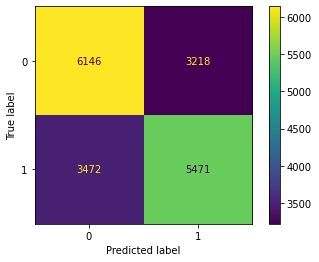

In [42]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_xgboost)

ConfusionMatrixDisplay(cm).plot();

In [43]:
print(classification_report(y_test, y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      9364
           1       0.63      0.61      0.62      8943

    accuracy                           0.63     18307
   macro avg       0.63      0.63      0.63     18307
weighted avg       0.63      0.63      0.63     18307



    Action :

Testing menggunakan ensamble learning XGBoost dengan hyperparameters tuning

In [44]:
# Define list of hyperparameters yang mau di-tuning
# Untuk xgboost, list of hyperparams dapat dicek di https://xgboost.readthedocs.io/en/stable/parameter.html

# Jangan lupa untuk menambahkan nama alias dari estimator pada pipeline 
    # dan diikuti 2 underscore (untuk tiap hyperparameter)
    # hyperparams yang di tunning adalah hyperparam yang secara umum di lakukan adjusment , ref: purwadhika
    
hyperparam_space= {
    'model__eta': [0.1, 0.3, 0.5], # bisa di sebut juga learning rate, benchmark 0.3 
    'model__gamma': [1, 0, 0.1], # laso treatment, benchmark 0
    'model__max_depth': [ 5, 6, 7], # kedalaman decision tree, benchmark 6
    'model__lambda': [1, 0.5, 0.1, 0.05, 0.01] # benchmark 1
}

In [45]:
estimator_xgb_tuning = Pipeline([
    ('preprocessing', transformer),
    ('resampling', rus),
    ('model', xgboost)
])

# Define crossval
crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi grid search
# Grid search digunakan untuk mencari dan mendapatkan kombinasi value terbaik dari tiap
    # hyperparameter yang kita define.
    
grid_search_xgb = GridSearchCV(
    estimator_xgb_tuning, # model to tune
    param_grid = hyperparam_space, # hyperparam space
    cv=crossval,
    scoring='recall', # metric
    return_train_score=True, # menampilkan hasil training tiap kombinasi
    n_jobs=-1
)


In [46]:
# Fitting data training untuk mencari nilai hyperparameter terbaik
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot_encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['JENIS_KELAMIN',
                                                                          'NAMA_STATUS_KAWIN']),
                                                                        ('robust_scaler',
                                                                         RobustScaler(),
                                                                         ['UMUR',
                                                                          'MASA_KERJA',
                                                                          'THP'])])),
                                       ('resampling',
                                        RandomUnderSam...
                                                      max_depth=6, max_leaves=0,
                                                      min_child_weight=1,
                                                      missing=nan,
                                                      monotone_constraints='()',
                                                      n_estimators=100,
                                                      n_jobs=0,
                                                      num_parallel_tree=1,
                                                      predictor='auto',
                                                      random_state=0,
                                                      reg_alpha=0, reg_lambda=1, ...))]),
             n_jobs=-1,
             param_grid={'model__eta': [0.1, 0.3, 0.5],
                         'model__gamma': [1, 0, 0.1],
                         'model__lambda': [1, 0.5, 0.1, 0.05, 0.01],
                         'model__max_depth': [5, 6, 7]},
             return_train_score=True, scoring='recall')

In [47]:
# Cek hasil grid search
tuning_result = pd.DataFrame(grid_search_xgb.cv_results_).sort_values(by='rank_test_score').head(1)
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__eta,param_model__gamma,param_model__lambda,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
105,3.086263,0.102961,0.0597,0.006332,0.5,0,1,5,"{'model__eta': 0.5, 'model__gamma': 0, 'model_...",0.622589,0.618256,0.625245,0.610987,0.624126,0.62024,0.0052,1,0.645897,0.647505,0.646771,0.649497,0.644535,0.646841,0.001656


In [48]:
tuning_result[(tuning_result['param_model__eta'] == 0.1) & (tuning_result['param_model__gamma'] == 1) & (tuning_result['param_model__lambda'] == 1
                        ) & (tuning_result['param_model__max_depth'] == 7)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__eta,param_model__gamma,param_model__lambda,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score


In [49]:
# Cek nilai metric terbaik dan hyperparams value terbaik
print(grid_search_xgb.best_score_)
print(grid_search_xgb.best_params_)

0.6202404249370981
{'model__eta': 0.1, 'model__gamma': 0, 'model__lambda': 1, 'model__max_depth': 5}


In [50]:
grid_search_xgb.best_estimator_[2]

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.1,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', lambda=1,
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [51]:
best_model_xgb = grid_search_xgb.best_estimator_
best_model_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['JENIS_KELAMIN',
                                                   'NAMA_STATUS_KAWIN']),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  ['UMUR', 'MASA_KERJA',
                                                   'THP'])])),
                ('resampling', RandomUnderSampler(random_state=42)),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callb...
                               eval_metric=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', lambda=1,
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=5, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, ...))])

In [52]:
y_pred_best_xgb = best_model_xgb.predict(X_test)

In [53]:
'Metrics sebelum hyperparameters tuning XGBoost'

print('Accuracy score =', accuracy_score(y_test, y_pred_xgboost))
print('Recall score =', recall_score(y_test, y_pred_xgboost))
print('Precision score =', precision_score(y_test, y_pred_xgboost))
print('F1-score =', f1_score(y_test, y_pred_xgboost))

Accuracy score = 0.6345660130004916
Recall score = 0.6117633903611763
Precision score = 0.6296466797099781
F1-score = 0.6205762250453721


In [54]:
'Metrics setelah hyperparameters tuning XGBoost'
print('Accuracy score =', accuracy_score(y_test, y_pred_best_xgb))
print('Recall score =', recall_score(y_test, y_pred_best_xgb))
print('Precision score =', precision_score(y_test, y_pred_best_xgb))
print('F1-score =', f1_score(y_test, y_pred_best_xgb))

Accuracy score = 0.6299229802807669
Recall score = 0.6147825114614782
Precision score = 0.622791119166289
F1-score = 0.618760902594114


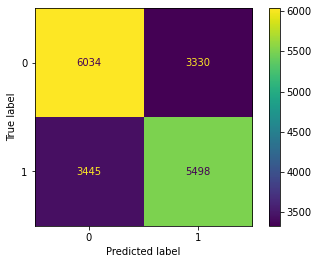

In [55]:
# Plot confusion matrix untuk penalized model
cm_tree_pen = confusion_matrix(y_test, y_pred_best_xgb)

ConfusionMatrixDisplay(cm_tree_pen).plot();

In [56]:
print(classification_report(y_test, y_pred_best_xgb))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      9364
           1       0.62      0.61      0.62      8943

    accuracy                           0.63     18307
   macro avg       0.63      0.63      0.63     18307
weighted avg       0.63      0.63      0.63     18307



    Result :

- Recall score yang di hasilkan XGBoost setelah hyperparameters tuning sedikit meningkat sekitar 0.03 menjadi 0.614 dari 0.611.

- Recall (P) 0.61  = 61 % --> TP / (TP+FN) --> Dari sisi Computer Scientist dapat dikatakan bahwa model ini dapat memprediksi pencapaian KPI FBI 6 dari 10 cabang dengan benar.

> FEATURE IMPORTANCE XGBOOST

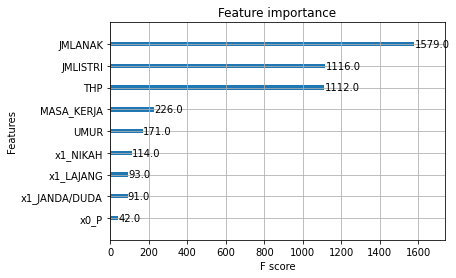

In [57]:
from xgboost import plot_importance

plot_importance(xgboost).set_yticklabels(feature_names);

    Result :

- Dari hasil ploting grafik feature importance di atas di dapatkan fitur JMLANAK merupakan fitur paling berpengaruh dalam permodelan XGBoost, hal ini diketahui dari nilai F statistics score, dimana makin tinggi F Score maka semakin berpengaruh.

Selanjutnya dilakukan data testing dengan menggunakan model AdaBoost untuk mencari permodelan dengan hasil recall tertinggi.

<hr>

    Action :

Data Testing menggunakan Ensamble Learning AdaBoost

In [58]:
estimator_adaboost= Pipeline([
    ('preprocess', transformer),
    ('resampling', ros),
    ('model', ada_boost)
])

estimator_adaboost.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['JENIS_KELAMIN',
                                                   'NAMA_STATUS_KAWIN']),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  ['UMUR', 'MASA_KERJA',
                                                   'THP'])])),
                ('resampling', RandomOverSampler(random_state=42)),
                ('model',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                          random_state=42),
                                    learning_rate=0.1, n_estimators=200,
                                    random_state=2020))])

In [59]:
# Predict to X_test
y_pred_adaboost = estimator_adaboost.predict(X_test)

In [60]:
# Metrics
print('Accuracy score =', accuracy_score(y_test, y_pred_adaboost))
print('Recall score =', recall_score(y_test, y_pred_adaboost))
print('Precision score =', precision_score(y_test, y_pred_adaboost))
print('F1-score =', f1_score(y_test, y_pred_adaboost))

Accuracy score = 0.6313432020538592
Recall score = 0.6120988482612099
Precision score = 0.6253141421064656
F1-score = 0.6186359269932757


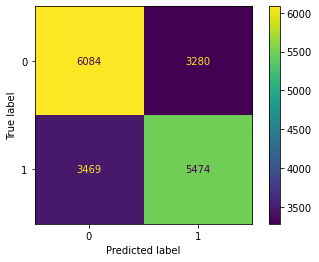

In [61]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_adaboost)

ConfusionMatrixDisplay(cm).plot();

In [62]:
print(classification_report(y_test, y_pred_adaboost))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64      9364
           1       0.63      0.61      0.62      8943

    accuracy                           0.63     18307
   macro avg       0.63      0.63      0.63     18307
weighted avg       0.63      0.63      0.63     18307



Result :

- Hasil permodelan dengan Adaboost (default parameter) menunjukan recall score yang tidak jauh berbeda dengan permodelan menggunakan XGBoost

    Action :

- Melakukan data testing dengan hyperparameter tuning Adaboost

In [63]:
# Define list of hyperparameters yang mau di-tuning

# Jangan lupa untuk menambahkan nama alias dari estimator pada pipeline 
    # dan diikuti 2 underscore (untuk tiap hyperparameter)
hyperparam_space= {
    'model__algorithm': ['SAMME.R','SAMME'], # benchmark default (SAMME.R)
    'model__learning_rate': [0.01,0.1,1.0], # benchmark 1.0
    'model__n_estimators': [50,100,200], # benchmark 50
    'model__random_state':[42,2020] # benchmark none
}

In [64]:
# Hyperparameter tuning dengan menggunakan pipeline

estimator_ada_tuning = Pipeline([
    ('preprocessing', transformer),
    ('resampling', rus),
    ('model', ada_boost)
])


# Define crossval
crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi grid search
# Grid search digunakan untuk mencari dan mendapatkan kombinasi value terbaik dari tiap
    # hyperparameter yang kita define.
grid_search_ada = GridSearchCV(
    estimator_ada_tuning, # model to tune
    param_grid = hyperparam_space, # hyperparam space
    cv=crossval,
    scoring='recall', # metric
    return_train_score=True, # menampilkan hasil training tiap kombinasi
    n_jobs=-1
)


In [65]:
# Fitting data training untuk mencari nilai hyperparameter terbaik
grid_search_ada.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one_hot_encoder',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['JENIS_KELAMIN',
                                                                          'NAMA_STATUS_KAWIN']),
                                                                        ('robust_scaler',
                                                                         RobustScaler(),
                                                                         ['UMUR',
                                                                          'MASA_KERJA',
                                                                          'THP'])])),
                                       ('resampling',
                                        RandomUnderSam...
                                        AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                                                 random_state=42),
                                                           learning_rate=0.1,
                                                           n_estimators=200,
                                                           random_state=2020))]),
             n_jobs=-1,
             param_grid={'model__algorithm': ['SAMME.R', 'SAMME'],
                         'model__learning_rate': [0.01, 0.1, 1.0],
                         'model__n_estimators': [50, 100, 200],
                         'model__random_state': [42, 2020]},
             return_train_score=True, scoring='recall')

In [66]:
# Cek hasil grid search
tuning_result = pd.DataFrame(grid_search_ada.cv_results_).sort_values(by='rank_test_score').head(5)
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__algorithm,param_model__learning_rate,param_model__n_estimators,param_model__random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
10,34.899590,4.447863,0.741140,0.140602,SAMME.R,0.1,200,42,"{'model__algorithm': 'SAMME.R', 'model__learni...",0.624546,0.610568,0.625524,0.606793,0.625524,0.618591,0.008187,1,0.646841,0.644744,0.656626,0.650056,0.651838,0.650021,0.004120
11,32.936328,3.457138,0.539904,0.035401,SAMME.R,0.1,200,2020,"{'model__algorithm': 'SAMME.R', 'model__learni...",0.621750,0.610707,0.625384,0.606793,0.625384,0.618004,0.007770,2,0.647994,0.644744,0.656626,0.650056,0.651838,0.650252,0.003965
13,8.208721,0.242311,0.143538,0.008490,SAMME.R,1.0,50,2020,"{'model__algorithm': 'SAMME.R', 'model__learni...",0.619094,0.609030,0.621331,0.613084,0.617417,0.615991,0.004406,3,0.654843,0.643137,0.652956,0.657150,0.648274,0.651272,0.005006
12,7.252119,0.214393,0.140753,0.015412,SAMME.R,1.0,50,42,"{'model__algorithm': 'SAMME.R', 'model__learni...",0.618815,0.608611,0.621331,0.613223,0.616997,0.615795,0.004460,4,0.654739,0.643521,0.652956,0.657150,0.648274,0.651328,0.004867
8,15.147361,0.088269,0.286005,0.019468,SAMME.R,0.1,100,42,"{'model__algorithm': 'SAMME.R', 'model__learni...",0.619234,0.608750,0.625105,0.594772,0.629997,0.615572,0.012582,5,0.633422,0.628634,0.635868,0.627761,0.641145,0.633366,0.004911


In [67]:
tuning_result[(tuning_result['param_model__algorithm'] == 'SAMME.R') & (tuning_result['param_model__learning_rate'] == 0.1) & (tuning_result['param_model__n_estimators'] == 200
                        ) & (tuning_result['param_model__random_state'] == 42)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__algorithm,param_model__learning_rate,param_model__n_estimators,param_model__random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
10,34.89959,4.447863,0.74114,0.140602,SAMME.R,0.1,200,42,"{'model__algorithm': 'SAMME.R', 'model__learni...",0.624546,0.610568,0.625524,0.606793,0.625524,0.618591,0.008187,1,0.646841,0.644744,0.656626,0.650056,0.651838,0.650021,0.00412


In [68]:
# Cek nilai metric terbaik dan hyperparams value terbaik
print(grid_search_ada.best_score_)
print(grid_search_ada.best_params_)

0.618590998043053
{'model__algorithm': 'SAMME.R', 'model__learning_rate': 0.1, 'model__n_estimators': 200, 'model__random_state': 42}


In [69]:
grid_search_ada.best_estimator_[2]

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         random_state=42),
                   learning_rate=0.1, n_estimators=200, random_state=42)

In [70]:
# Fitting ulang dengan hasil grid-search
best_model_ada = grid_search_ada.best_estimator_
best_model_ada.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['JENIS_KELAMIN',
                                                   'NAMA_STATUS_KAWIN']),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  ['UMUR', 'MASA_KERJA',
                                                   'THP'])])),
                ('resampling', RandomUnderSampler(random_state=42)),
                ('model',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                          random_state=42),
                                    learning_rate=0.1, n_estimators=200,
                                    random_state=42))])

In [71]:
# Predict to X_test menggunakan hasil tuning
y_pred_best_ada = best_model_ada.predict(X_test)

In [72]:
# Metrics before tuning
print('Accuracy score =', accuracy_score(y_test, y_pred_adaboost))
print('Recall score =', recall_score(y_test, y_pred_adaboost))
print('Precision score =', precision_score(y_test, y_pred_adaboost))
print('F1-score =', f1_score(y_test, y_pred_adaboost))

Accuracy score = 0.6313432020538592
Recall score = 0.6120988482612099
Precision score = 0.6253141421064656
F1-score = 0.6186359269932757


In [73]:
# Metrics before tuning
print('Accuracy score =', accuracy_score(y_test, y_pred_best_ada))
print('Recall score =', recall_score(y_test, y_pred_best_ada))
print('Precision score =', precision_score(y_test, y_pred_best_ada))
print('F1-score =', f1_score(y_test, y_pred_best_ada))

Accuracy score = 0.6331457912273993
Recall score = 0.6199261992619927
Precision score = 0.6256630177180905
F1-score = 0.6227813974387779


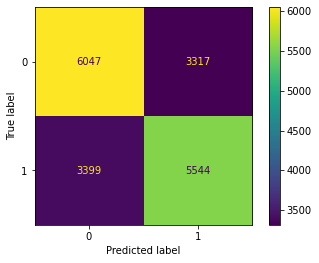

In [74]:
# Plot confusion matrix untuk penalized model
cm_tree_pen = confusion_matrix(y_test, y_pred_best_ada)

ConfusionMatrixDisplay(cm_tree_pen).plot();

In [75]:
print(classification_report(y_test, y_pred_best_ada))

              precision    recall  f1-score   support

           0       0.64      0.65      0.64      9364
           1       0.63      0.62      0.62      8943

    accuracy                           0.63     18307
   macro avg       0.63      0.63      0.63     18307
weighted avg       0.63      0.63      0.63     18307



    Result

Hasil Adaptive Boosting setelah dilakukan hyperparameters tuning dengan metode grid_search best hyperparams, menunjukan peningkatan recall lebih tinggi dari pada hasil hyperparams tunning pada model XGBoost.

 - XGBoost before tuning     : 0.61
 - XGBoost after tuning      : 0.61
 - AdaBoost before tuning    : 0.61
 - AdaBoost afer tuning      : 0.62

<hr>

> FEAUTURE IMPORTANCE

    Action :

- Mencari feature importance dari permodelan Adaptive Booster


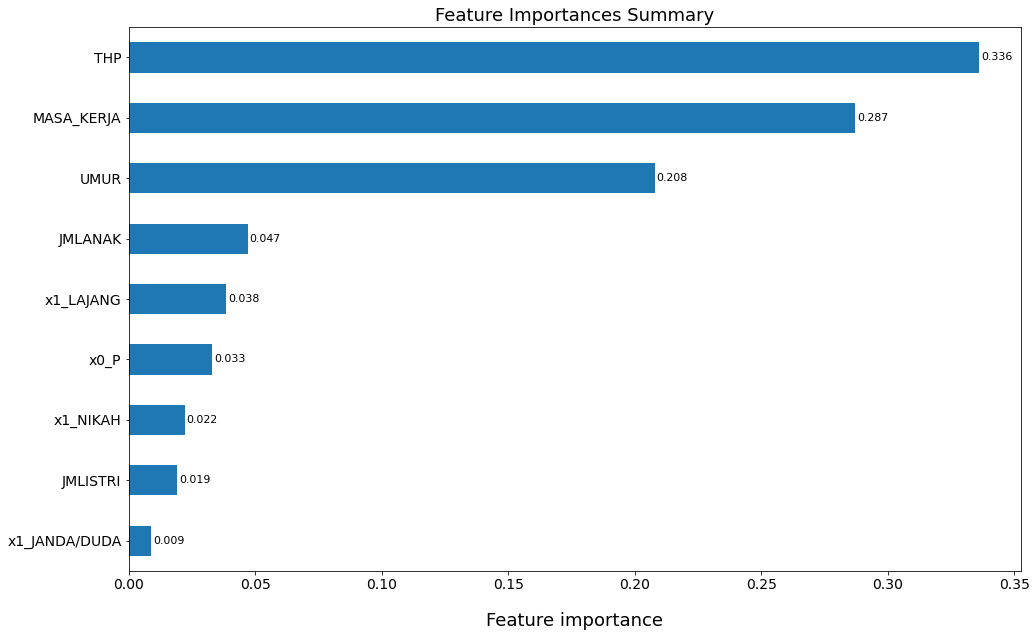

In [76]:
feature_importance = pd.Series(ada_boost.feature_importances_, feature_names).sort_values(ascending=True)

fig, ax = plt.subplots(figsize=(16, 10))
plot = feature_importance.plot(kind='barh', title='Feature Importances')
for i in plot.containers:
    plot.bar_label(i, label_type='edge', padding=2, labels=[f'{x:.3f}' for x in i.datavalues], size=11)

plt.title('Feature Importances Summary', fontsize=18)
plt.xlabel('Feature importance', fontsize=18, labelpad=20)
plt.ylabel('', fontsize=18, labelpad=0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);


    Result :

Dari grafik feature importance di ketahui bahwa fitur yang paling penting dalam menentukan prediksi menggunakan permodelan Adaptive Boosting dengan Base Model Decision Tree adalah fitur 'THP'.

Hasil permodelan ini masih sangat rendah dan perlu di tingkatkan.

<hr>

# LIMITATION, CONCLUSION AND RECOMENDATION

> LIMITATION


- Data yang di sediakan adalah data gaji PNS, dengan Notas (primary key) yang sudah di masking (di hide), sehingga informasi yang bisa di dapatkan menjadi sangat terbatas,
- Komputer yang digunakan untuk melakukan permodelan memiliki spesifikasi yang rendah menjadi kendala Data Scientist untuk melakukan explorasi permodelan


> CONCLUSION

    MODEL

Permodelan yang dengan hasil terbaik adalah 

- Base Model          : Decision Tree
- Ensamble Learning   : Adaptive Booster
- Model algorithm     : 'SAMME.R'
- Model learning rate : 0.1
- Model n_estimators  : 200
- Model Random state  : 42


    INSIGHT

Hasil maksimal dari permodelan adalah 0.62 recall score, artinya model dapat memprediksi 62 % porsi data dengan benar. Bila model di maksimalkan dan diterapkan pada proses perumusan KPI FBI Kantor cabang maka perusahaan akan mampu menentukan besaran KPI FBI yang berbasis resiko dengan lebih akurat. Hal tersebut akan membantu perusahaan dalam merumuskan kebijakan dan strategi yang lebih efektif dan efisien dalam meningkatkan revenue perusahaan serta peningkatan kinerja Kantor cabang.

Contoh Penerapan :

Sebuah Kantor Cabang tipe C dimasukan kedalam permodelan ini lalu di dapatkan prediksi bahwa kantor cabang tersebut tidak berhasil mencapai KPI. Maka Perusahan bisa melakukan penyesuaian (re-adjusment) pada kantor cabang tersebut, sehingga resiko kantor cabang tersebut gagal mencapai KPI akan bisa dimitigasi. 
Dampak bila banyak kantor cabang gagal mencapai KPI FBI adalah kinerja perusahaan pada laporan keuangan perusahaan akan rendah, dan perusahaan akan di nilai gagal menjalankan sistem Manajemen Kinerja Berbasis Resiko.

> RECOMENDATION :

    MODEL

- Penambahan fitur yang di asumsikan memiliki pengaruh yang lebih besar terhadap KPI FBI, contoh fitur 'MEMBER TASPEN LIFE'
- Explorasi jenis permodelan machine learning
- Upgrade spesifikasi komputer untuk permodelan
- Bekerja sama dengan divisi Renbang untuk analisis data secara lebih komprehensif

    PERUSAHAAN

- Memasukan data pada fitur-fitur yang penting dalam penentuan KPI seperti data fitur THP, Masa Kerja, dan Umur rata-rata peserta aktif Taspen (pegawai tetap)
- Perubahan KPI dari pembagian sama rata pertipe , menjadi KPI berbasis resiko sesuai dengan sasaran mutu perusahaan dan manajemen resiko yang saat ini menjadi perhatian stakeholder
- Strengthening kemampuan data engineering, data analisys, dan data scientist pada human resource perusahaan untuk meningkatkan kemampuan pengelolaan big data yang dimiliki Taspen